In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.io import loadmat

sns.set_style('whitegrid')

### Investigate

In [410]:
A = np.pi
a = 1
n = 600
ts = np.arange(1, 600+1)/120
ft = A * np.cos(2*np.pi * 5*ts + a)
ft = pd.Series(ft, index=ts)

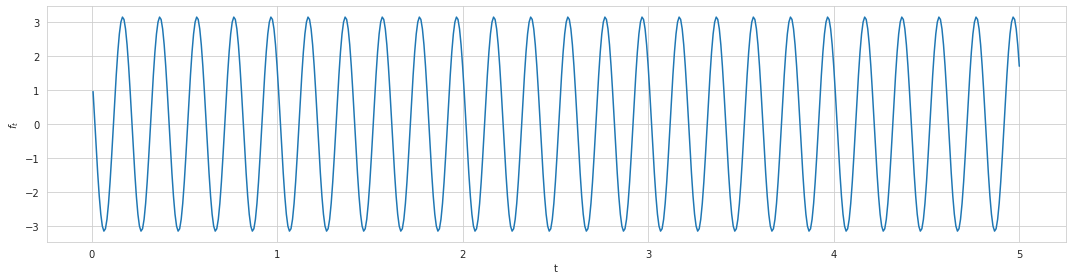

In [411]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(ts, ft)
ax.set_xlabel('t')
ax.set_ylabel('$f_t$')
fig.tight_layout()
fig.show()

In [56]:
ft.iloc[478]

2.3237753526258387

In [57]:
from collections import deque

np.random.seed(2123412)

standard_normals = deque(np.random.normal(loc=0, scale=1, size=n+2))

w0 = standard_normals.popleft()
w1 = standard_normals.popleft()
xs = []
for i in range(n):
    w = standard_normals.popleft()
    x = w + 0.4*w1 + 1.6*w0
    xs.append(x)

    w1 = w
    w0 = w1

xs = pd.Series(xs, index=ts)
ys = pd.Series(xs + ft, index=ts)

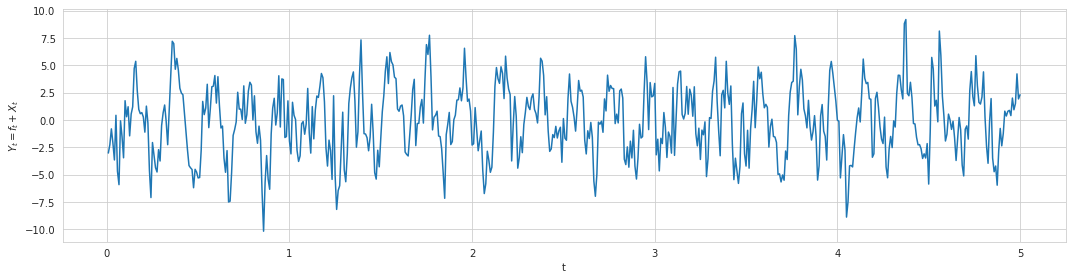

In [58]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(ts, ys)
ax.set_xlabel('t')
ax.set_ylabel('$Y_t = f_t + X_t$')
fig.tight_layout()
fig.show()

### MA(2)

In [133]:
arima = sm.tsa.ARIMA(ys, order=(0, 0, 2), trend='n').fit()

/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [122]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1368.714
Date:                Sat, 18 Feb 2023   AIC                           2743.427
Time:                        22:38:31   BIC                           2756.618
Sample:                             0   HQIC                          2748.562
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7599      0.037     20.514      0.000       0.687       0.832
ma.L2          0.2523      0.040      6.324      0.000       0.174       0.331
sigma2         5.6042      0.310     18.080      0.000       4.997       6.212
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.21   Prob(JB):                         0.32
Heteroskedasticity (H):               0.93   Skew:                            -0.05
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

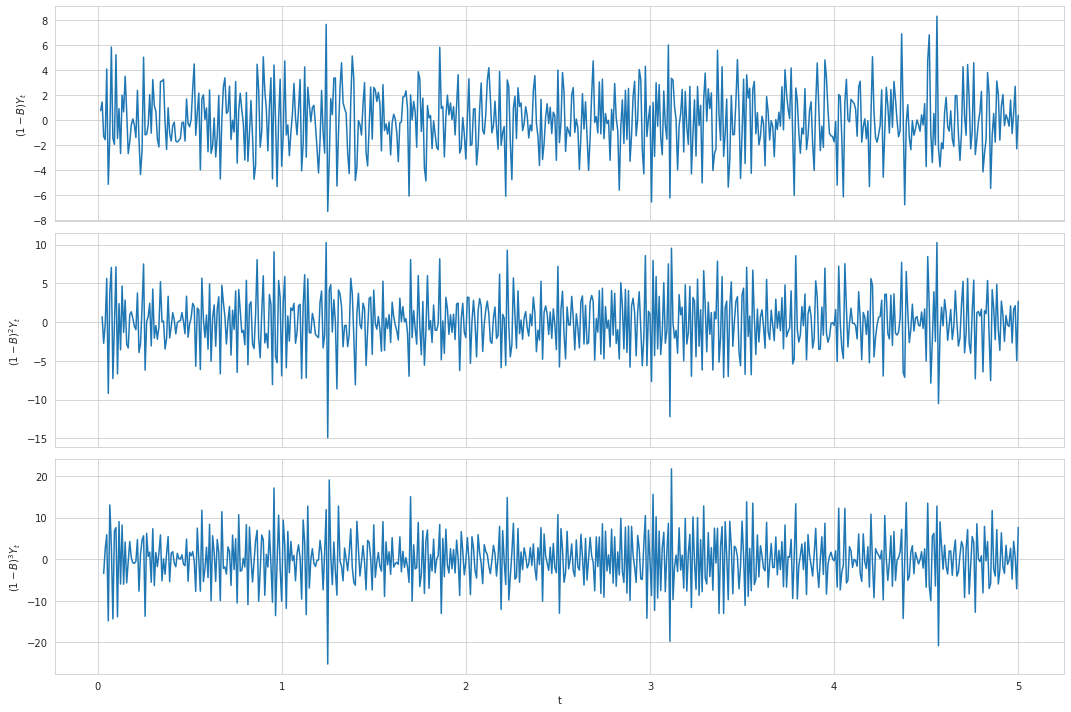

In [139]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10), sharex=True)
ax[0].plot(ys - ys.shift(1))
ax[1].plot(ys - 2*ys.shift(1) + ys.shift(2))
ax[2].plot(ys - 3*ys.shift(1) + 3*ys.shift(2) - ys.shift(3))

ax[0].set_ylabel('$(1-B) Y_t$')
ax[1].set_ylabel('$(1-B)^2 Y_t$')
ax[2].set_ylabel('$(1-B)^3 Y_t$')
ax[2].set_xlabel('t')

fig.tight_layout()
fig.show()

### SARIMA(0,0,2) x (0,1,1)_0.2

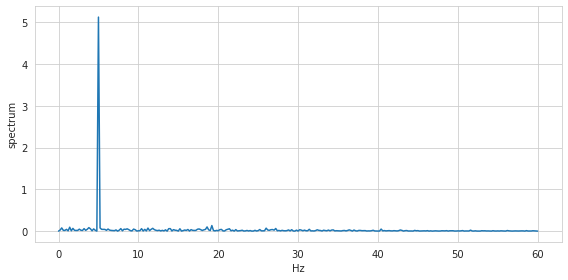

In [611]:
from scipy.signal import periodogram

fig, ax = plt.subplots(figsize=(8, 4))

f, p_den = periodogram(ys, 120, scaling='spectrum')
ax.plot(f, p_den)
ax.set_xlabel('Hz')
ax.set_ylabel('spectrum')

fig.tight_layout()
fig.show()

In [523]:
arima = sm.tsa.ARIMA(ys, order=(0,0,2), seasonal_order=(0, 1, 1, 24), trend='n').fit()
arima.summary()

/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  600
Model:             ARIMA(0, 0, 2)x(0, 1, [1], 24)   Log Likelihood               -1261.735
Date:                            Sun, 19 Feb 2023   AIC                           2531.469
Time:                                    01:04:33   BIC                           2548.894
Sample:                                         0   HQIC                          2538.264
                                            - 600                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5265      0.040     13.082      0.000       0.448       0.605
ma.L2          0.0377      0.043      0.885      0.376      -0.046       0.121
ma.S.L24      -0.9587      0.066    -14.620      0.000      -1.087      -0.830
sigma2         4.2343      0.304     13.934      0.000       3.639       4.830
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.96   Prob(JB):                         0.16
Heteroskedasticity (H):               0.90   Skew:                            -0.17
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/ztang484/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


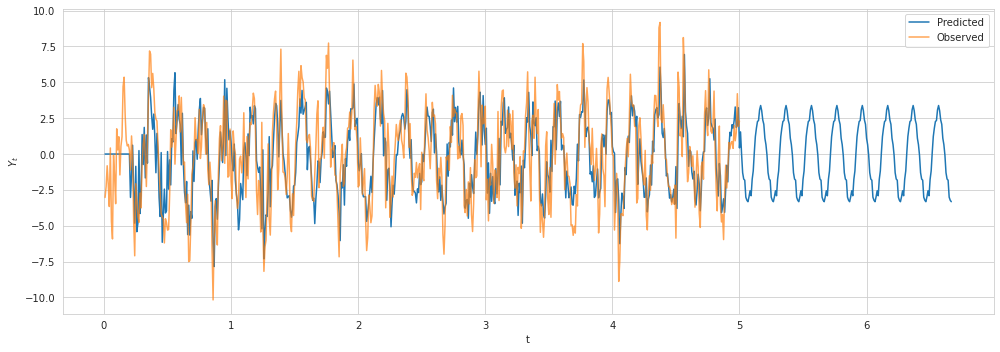

In [589]:
fig, ax = plt.subplots(figsize=(14, 5))

predicted_ys = arima.predict(start=0, end=800-1)
predicted_ys.index = np.arange(1,800+1)/120
predicted_ys.plot(label='Predicted', ax=ax)
ys.plot(alpha=0.7, label='Observed', ax=ax)

ax.legend(loc='best')
ax.set_xlabel('t')
ax.set_ylabel('$Y_t$')
fig.tight_layout()
fig.show()

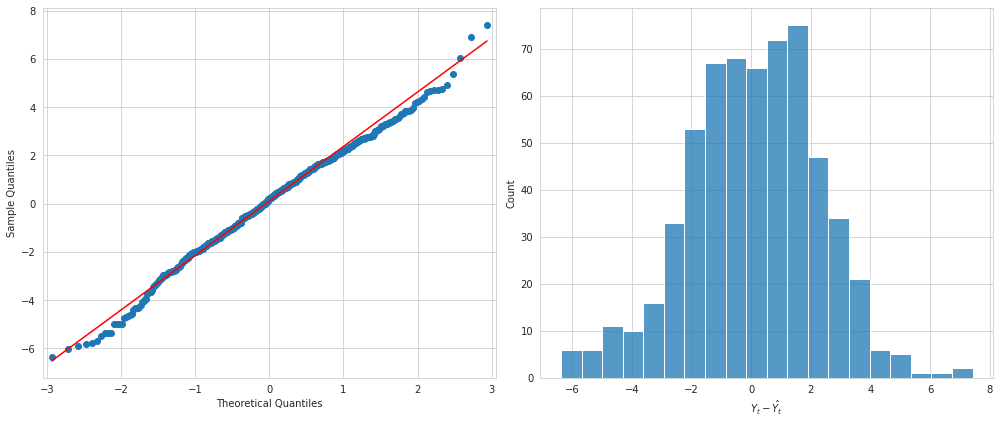

In [595]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

_ = sm.qqplot(arima.resid, dist=stats.norm, line='q', ax=ax[0])
sns.histplot(arima.resid, ax=ax[1])

ax[1].set_xlabel('$Y_t - \\hat{Y_t}$')
fig.tight_layout()
fig.show()

### More complicated structural

In [624]:
def ppg_morgh(k, l):
    A = 0.4 * k
    a = 2 * np.pi * l / 6
    n = 150
    ts = np.arange(1, 150+1)/150
    ft = np.cos(2*np.pi*5*ts) + A * np.cos(2*np.pi * 10*ts + a)
    return pd.Series(ft, index=ts)

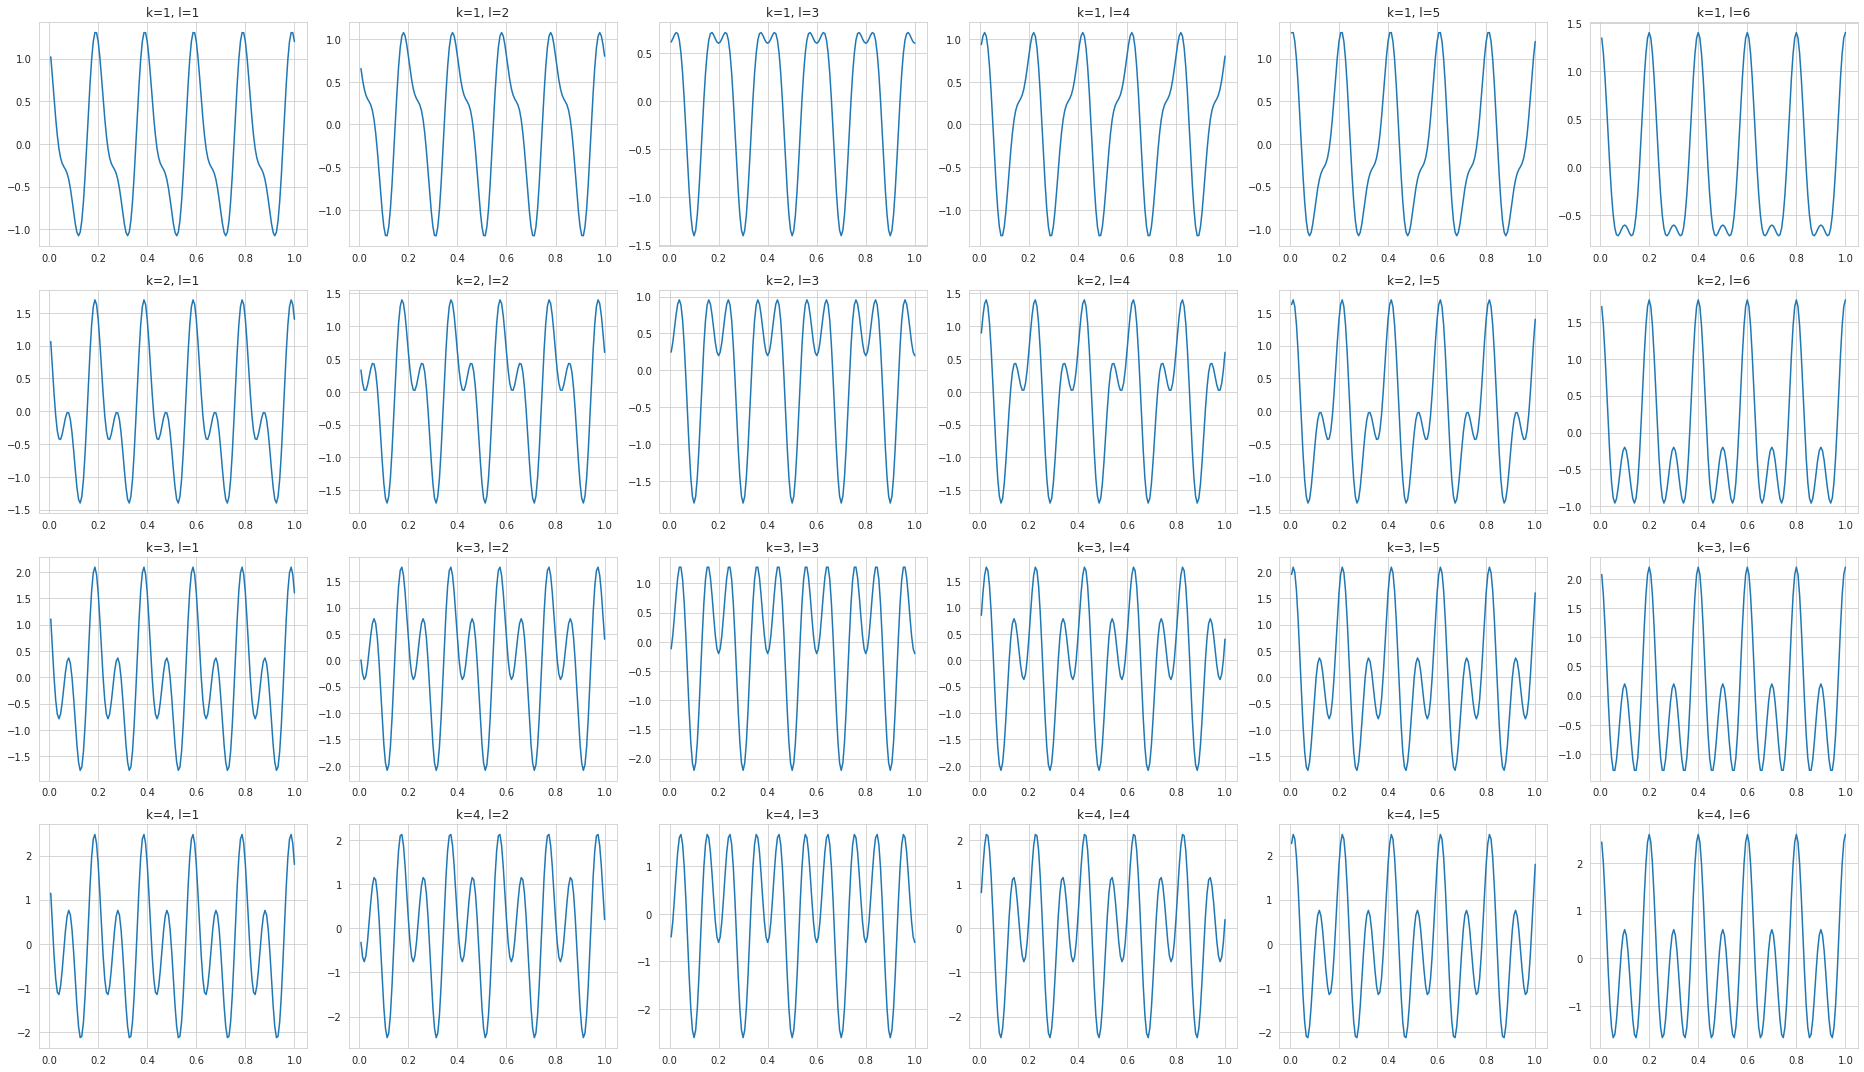

In [629]:
from itertools import product

fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(26, 15))

for (k, l) in product(range(1, 5), range(1, 7)):
    ppg_morgh(k, l).plot(ax=ax[k-1, l-1])
    ax[k-1, l-1].set_title(f'k={k}, l={l}')

fig.tight_layout()
fig.show()

In [664]:
A = 1.2
a = np.pi / 10
n = 150
ts = np.arange(1, n+1)/150
f1 = np.cos(2*np.pi*5*ts) + A * np.cos(2*np.pi * 10*ts + a)
f1 = pd.Series(f1, index=ts)

f2 = np.cos(2*np.pi*5*ts) + A * np.cos(2*np.pi * 3*np.pi*ts + a)
f2 = pd.Series(f2, index=ts)

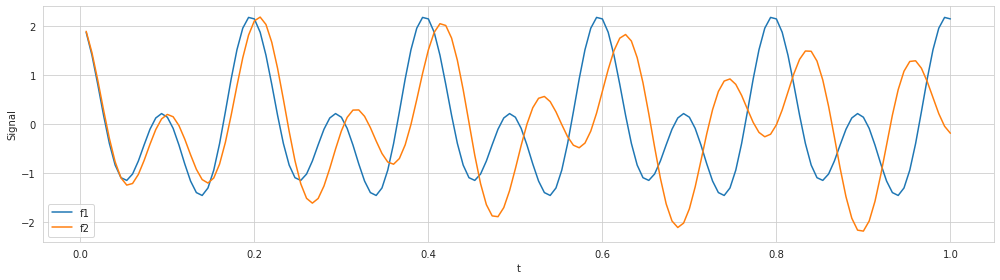

In [665]:
fig, ax = plt.subplots(figsize=(14, 4))

f1.plot(label='f1', ax=ax)
f2.plot(label='f2', ax=ax)

ax.legend(loc='best')
ax.set_xlabel('t')
ax.set_ylabel('Signal')
fig.tight_layout()
fig.show()